ASSIGNMENT 1 DATA SCIENCE AND ANALYTICS    
SHREYAS SHRIPAD KULKARNI


In [245]:
import numpy as np
import pandas as pd
import seaborn as sns



In [247]:
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [251]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [249]:
#This shows the number of NULL values in the Dataset
dataset.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
#Method 1 to Clean Dataset
#1.1 Drop rows or columns with missing values
dataset.dropna(inplace=True)
dataset.dropna(axis=1, inplace=True)
dataset.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [68]:
#1.2 Fill missing values with mean, median, or mode
dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
dataset['Cabin'].fillna(dataset['Cabin'].mode()[0], inplace=True)

dataset.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [110]:
#1.3 Fill the NULL/Missing Values with a specific value
dataset.Cabin = dataset.Cabin.fillna("0")
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64


In [70]:
#Method 2 Removing Duplicates
num_duplicates = dataset.duplicated().sum()

print("Number of duplicates:", num_duplicates)


# dataset.drop_duplicates(inplace=True)


Number of duplicates: 0


In [17]:
#Method 3 Handling Outliers
#3.1 Identify outliers using statistical methods such as z-score or IQR (Interquartile Range).
z_scores = np.abs((dataset['Age'] - dataset['Age'].mean()) / dataset['Age'].std())
outliers_zscore = dataset[z_scores > 3]

# Identify outliers using IQR
Q1 = dataset['Fare'].quantile(0.25)
Q3 = dataset['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = dataset[(dataset['Fare'] < Q1 - 1.5 * IQR) | (dataset['Fare'] > Q3 + 1.5 * IQR)]
dataset.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
#3.2 Remove outliers by filtering the dataset based on the identified outliers.
z_scores = (dataset['Fare'] - dataset['Fare'].mean()) / dataset['Fare'].std()
dataset = dataset[~(z_scores > 3)]

# Remove outliers identified using IQR
Q1 = dataset['Fare'].quantile(0.25)
Q3 = dataset['Fare'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['Fare'] < Q1 - 1.5 * IQR) | (dataset['Fare'] > Q3 + 1.5 * IQR))]

# Check for missing values
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            162
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          659
Embarked         0
dtype: int64

In [234]:
#Descriptive Statistical Analysis
#1.1 Summary Statistics for Numeric Columns
numeric_summary = dataset.describe()
print(numeric_summary)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [255]:
# 1.2 Summary Statistics for Categorical Columns
categorical_summary_sex = dataset["Sex"].value_counts()
categorical_summary_embarked = dataset["Embarked"].value_counts()

print("Sex Distribution:")
print(categorical_summary_sex)
print("\nEmbarked Distribution:")
print(categorical_summary_embarked)

Sex Distribution:
male      577
female    314
Name: Sex, dtype: int64

Embarked Distribution:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [238]:
#1.3 Count the number of missing values
dataset.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

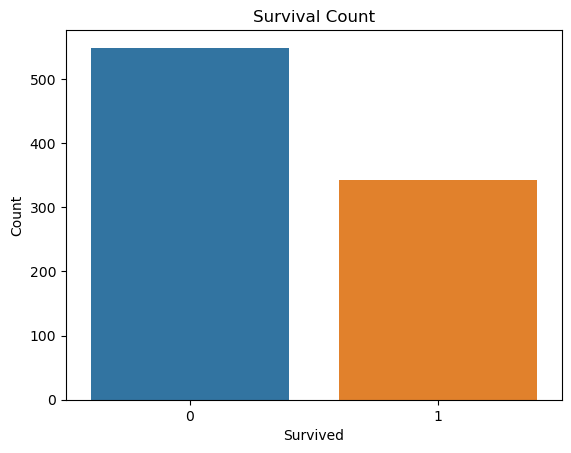

In [156]:
dataset = sns.load_dataset('titanic')
sns.countplot(x='survived', data=dataset,)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()
# 0-> Not Survived
# 1-> Survived

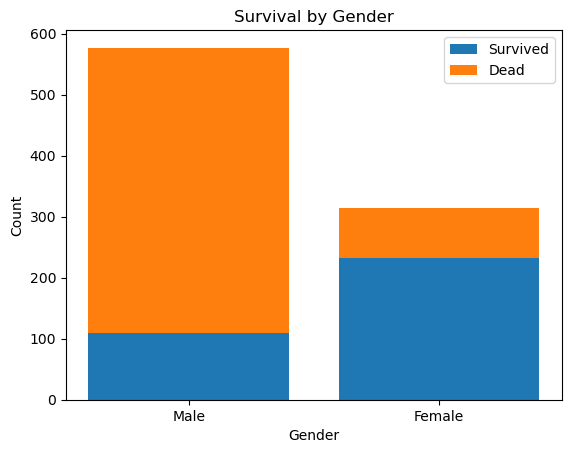

In [162]:
dataset = sns.load_dataset('titanic')
male = dataset[dataset['sex'] == 'male']
female = dataset[dataset['sex'] == 'female']

male_survived = male[male['survived'] == 1].shape[0]
male_dead = male[male['survived'] == 0].shape[0]
female_survived = female[female['survived'] == 1].shape[0]
female_dead = female[female['survived'] == 0].shape[0]

plt.bar(['Male', 'Female'], [male_survived, female_survived], label='Survived')
plt.bar(['Male', 'Female'], [male_dead, female_dead], bottom=[male_survived, female_survived], label='Dead')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.show()

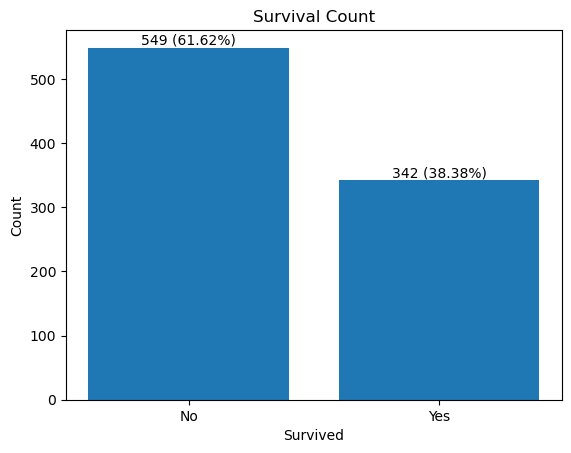

In [158]:
dataset = pd.read_csv('titanic.csv')

survived_count = dataset['Survived'].value_counts()

survival_percentage = survived_count / len(dataset) * 100

plt.bar(survived_count.index, survived_count.values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.xticks(survived_count.index, ['No', 'Yes'])

plt.text(0, survived_count[0], f'{survived_count[0]} ({survival_percentage[0]:.2f}%)', ha='center', va='bottom')
plt.text(1, survived_count[1], f'{survived_count[1]} ({survival_percentage[1]:.2f}%)', ha='center', va='bottom')

plt.show()

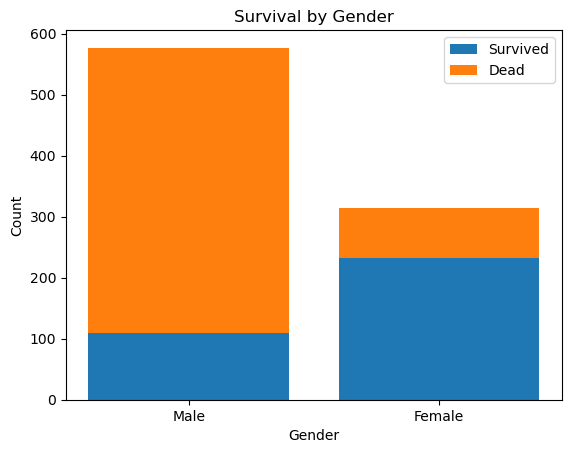

Males Survived =  109
Males Dead =  468
Females Survived =  233
Females Dead =  81
Male Survived =  18.89 %
Female Survived =  74.2 %


In [218]:
dataset = sns.load_dataset('titanic')
male = dataset[dataset['sex'] == 'male']
female = dataset[dataset['sex'] == 'female']

male_survived = male[male['survived'] == 1].shape[0]
male_dead = male[male['survived'] == 0].shape[0]
female_survived = female[female['survived'] == 1].shape[0]
female_dead = female[female['survived'] == 0].shape[0]

plt.bar(['Male', 'Female'], [male_survived, female_survived], label='Survived')
plt.bar(['Male', 'Female'], [male_dead, female_dead], bottom=[male_survived, female_survived], label='Dead')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.show()

print('Males Survived = ',male_survived)
print("Males Dead = ",male_dead)
print('Females Survived = ',female_survived)
print('Females Dead = ',female_dead)

percentage_male_survived=round((100*(male_survived)/(male_survived+male_dead)),2)
print('Male Survived = ',percentage_male_survived,'%')

percentage_female_survived=round((100*(female_survived)/(female_survived+female_dead)),2)
print('Female Survived = ',percentage_female_survived,'%')